In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import comb
from itertools import chain

# Ex. 4.15

In [18]:
def log(x):
    if (x == 0):
        return 1
    else:
        return (math.log(x, 2))

In [19]:
def combinatorial(p, N, r):
    if (N>10 and N<N-10):
        return int(2**(N*(p*log(p) + (1-p)*log(1-p))))
    else: 
        return int(comb(N, r))

In [20]:
def prob_x(p, N, r):
    return p**r*(1-p)**(N - r)

In [21]:
def prob_r(p, N, r):
    values = []
    if (r == 0 or r == N):
        return [prob_x(p, N, r)]  
    else:
        values.append(prob_x(p, N, r))
        return np.array(values*combinatorial(p, N, r)).tolist()

Plot for N=1, N=2 and N=3

In [26]:
N = 10

probs_N = [prob_r(0.1, N, r) for r in range (0, N + 1)]
probs_N = list(chain(*probs_N))
bits = []
delta = []
pr_sort = sorted(probs_N)

delta.append(0)
bits.append(log(len(pr_sort))/N)

while (len(pr_sort) > 2):
    delta.append(pr_sort[0])    
    pr_sort[1] = pr_sort[0] + pr_sort[1]
    pr_sort.remove(pr_sort[0])
    bits.append(log(len(pr_sort))/N)

for y in np.arange(pr_sort[0], 1, 0.01):
            delta.append(y)
            bits.append(0)

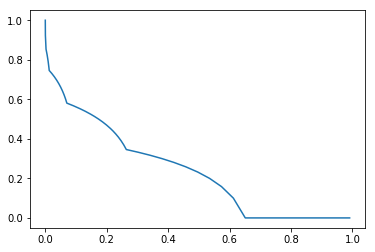

In [27]:
plt.plot(delta, bits)